# Image Processing

Blending & Pasting Images - This is particularly useful if you would like to synthetically augment a dataset or highlight something within an image.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

# Load Image
img1 = cv2.imread('lyit.jpg')
img2 = cv2.imread('newcourses.jpg')

#Set both images to RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

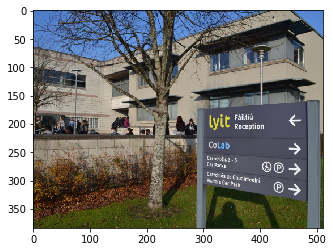

In [6]:
plt.imshow(img1)

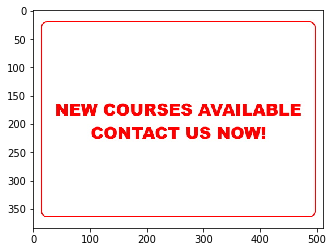

In [7]:
plt.imshow(img2)

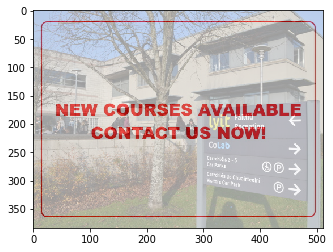

In [8]:
#Both these images are the same size so it is easy to blend the images together.
blended = cv2.addWeighted(src1=img1,alpha=0.4,src2=img2,beta=0.6,gamma=0) #Try changing the alpha and beta value.
plt.imshow(blended)

That works great if the images are the same size, but what happens if they are different sizes?
You will get an error using the cv2.addWeighted function - "Sizes of input arguments do not match".

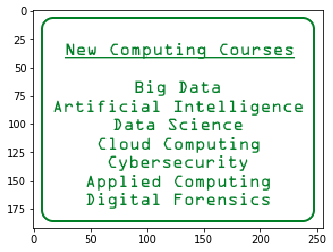

In [30]:
img2 = cv2.imread('compcourses.png')
plt.imshow(img2) #Smaller image loaded.

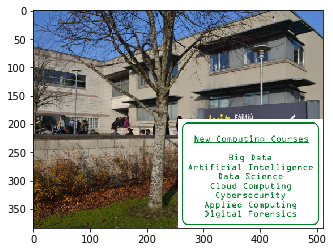

In [11]:
bigimg = img1
smallimg = img2

x_offset=256 #Width
y_offset=192 #Height

bigimg[y_offset:y_offset+smallimg.shape[0], x_offset:x_offset+smallimg.shape[1]] = smallimg
plt.imshow(bigimg)

So we were able to paste a smaller image on top of a bigger image, but this isn't as natural is the blending effect previously performed. We can do this with different size image but it means using an ROI (Region Of Interest) and creating a mask. This will invole multiple steps.

*   Region of Interest


In [12]:
img1 = cv2.imread('lyit.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1.shape

(384, 512, 3)

In [13]:
img2.shape

(192, 256, 3)

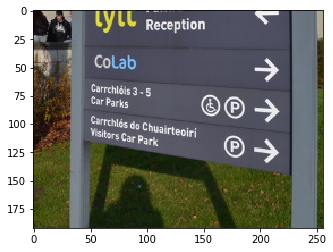

In [14]:
x_offset=512-256
y_offset=384-192
roi = img1[y_offset:384,x_offset:512] # BOTTOM RIGHT CORNER
plt.imshow(roi)



*   Creating the Mask



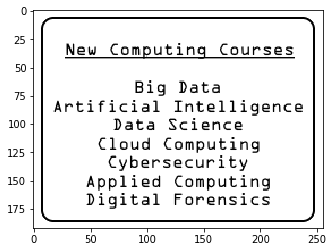

In [17]:
img2grayscale = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
plt.imshow(img2grayscale,cmap='gray')

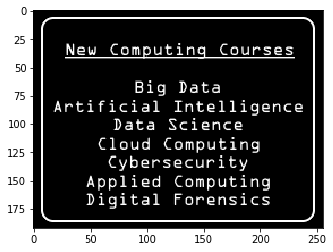

In [18]:
mask_inv = cv2.bitwise_not(img2grayscale) #Inverse Mask
plt.imshow(mask_inv,cmap='gray')

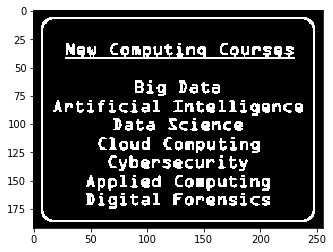

In [19]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)
plt.imshow(bk)



*   Bring back the Colour



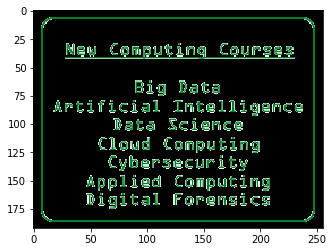

In [20]:
colour = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(colour)



*   Blend Mask with ROI



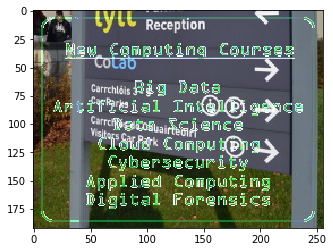

In [21]:
final_roi = cv2.bitwise_or(roi,colour)
plt.imshow(final_roi)

Now it is time to add this smaller image to the larger image by pasting it like we did before.

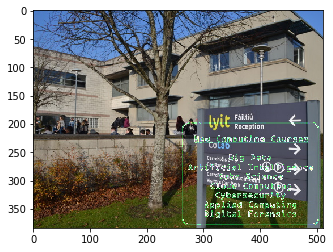

In [22]:
bigimg = img1
smallimg = final_roi


bigimg[y_offset:y_offset+smallimg.shape[0], x_offset:x_offset+smallimg.shape[1]] = smallimg

plt.imshow(bigimg)

# Challenge

Now try this yourself, instead of blending image2 into the bottom right of the image try blending it into the top left. It will be easier than this!

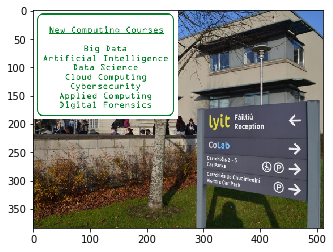

In [31]:
bigimg = img1
smallimg = img2

x_offset=0 #Width
y_offset=0 #Height

bigimg[y_offset:y_offset+smallimg.shape[0], x_offset:x_offset+smallimg.shape[1]] = smallimg
plt.imshow(bigimg)

In [48]:
img1 = cv2.imread('lyit.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1.shape

(384, 512, 3)

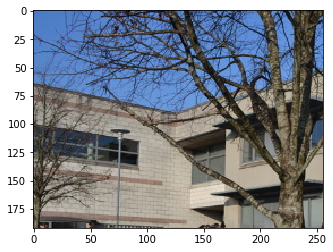

In [39]:
x_offset=512-256
y_offset=384-192
roi = img1[0:y_offset,0:x_offset] # TOP LEFT CORNER
plt.imshow(roi)

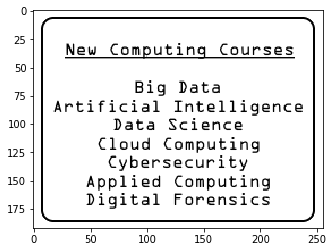

In [40]:
img2grayscale = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
plt.imshow(img2grayscale,cmap='gray')

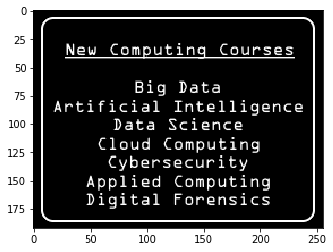

In [41]:
mask_inv = cv2.bitwise_not(img2grayscale) #Inverse Mask
plt.imshow(mask_inv,cmap='gray')

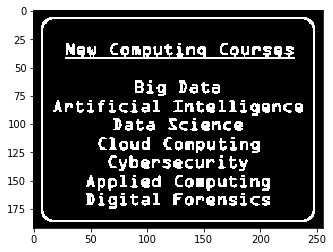

In [42]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)
plt.imshow(bk)

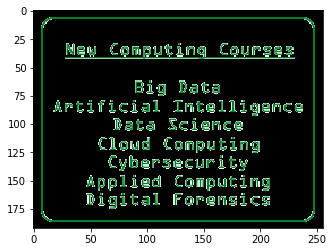

In [43]:
colour = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(colour)

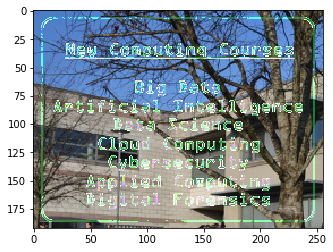

In [44]:
final_roi = cv2.bitwise_or(roi,colour)
plt.imshow(final_roi)

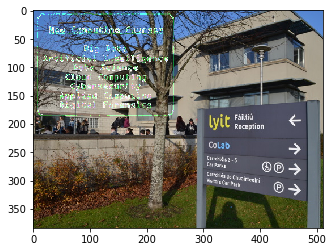

In [50]:
bigimg = img1
smallimg = final_roi


bigimg[0:0+smallimg.shape[0], 0:0+smallimg.shape[1]] = smallimg

plt.imshow(bigimg)

# Blurring

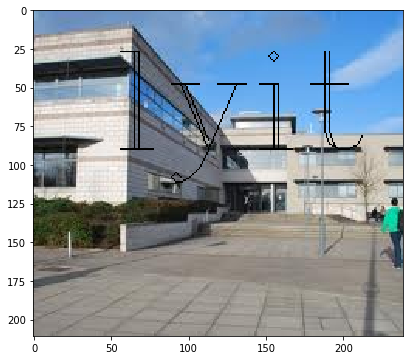

In [52]:
img1 = cv2.imread('lyitfront.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img1,text='lyit',org=(50,90), fontFace=font,fontScale= 3,color=(0,0,0),thickness=1)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.imshow(img1)

# 2D Convolution

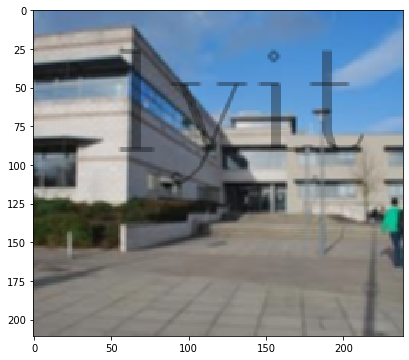

In [57]:
kernel = np.ones(shape=(3,3),dtype=np.float32)/10 #Explore these values, change them and see the impact on the image.
blurredimg = cv2.filter2D(img1,-1,kernel) #-1 is automatically assigning the output depth to be the same as the input depth.

#Display Image
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.imshow(blurredimg)

# OpenCV Blur Function

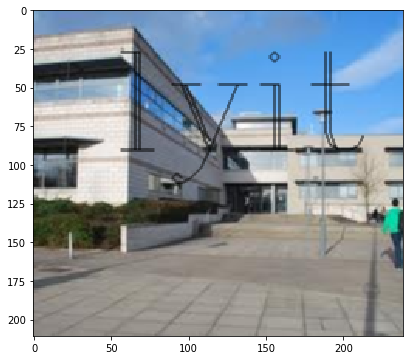

In [58]:
blurredimg = cv2.blur(img1, ksize=(2,2)) #The shape of the kernel can be changed. The higher the value, the image will be more blurred.
#Display Image
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.imshow(blurredimg)

# Gaussian Blur

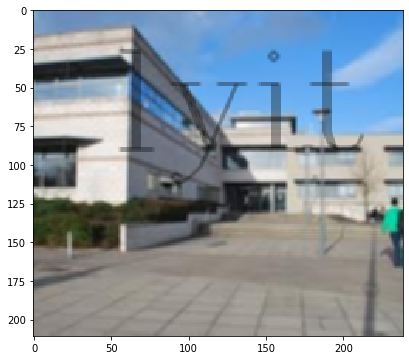

In [66]:
blurredimg = cv2.GaussianBlur(img1,(3,3),10) #Change the sigma value from 10 and the kernel shape to see if this has an impact.
#Display Image
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.imshow(blurredimg)

# Median Blur on Noisy Image

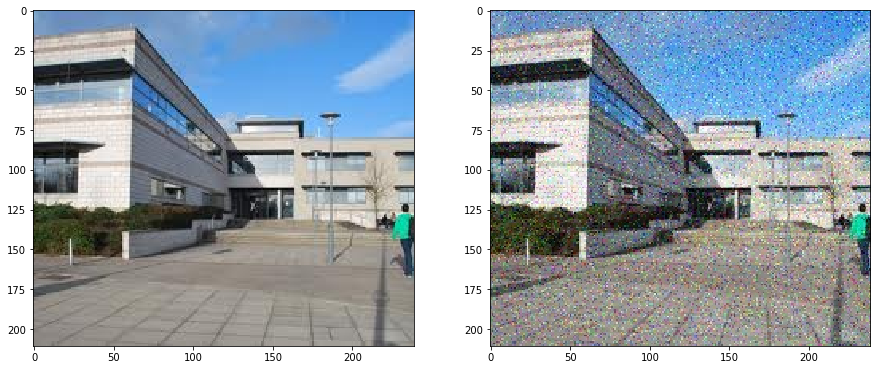

In [67]:
notnoisy = cv2.imread('lyitfront.jpg')
noisy = cv2.imread('lyitfrontnoisy.jpg')
notnoisy = cv2.cvtColor(notnoisy, cv2.COLOR_BGR2RGB)
noisy = cv2.cvtColor(noisy, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(notnoisy)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(noisy)

In [68]:
notnoisy.mean() #This image has a min of 0 and a max of 255.

143.73040644602642

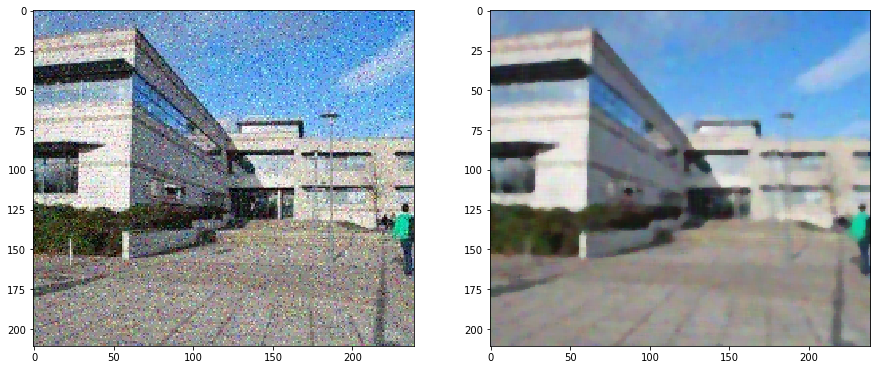

In [69]:
median = cv2.medianBlur(noisy,5)

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(noisy)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(median)

# Thresholding

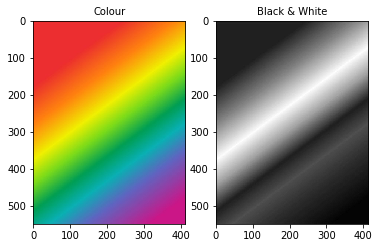

In [70]:
rainbow = cv2.imread('rainbow.jpg')
rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)
bwrainbow = cv2.imread('rainbow.jpg',0) #0 for Black & White Image
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
plt.title('Colour', fontsize=10)
ax1.imshow(rainbow)
ax2 = fig.add_subplot(1,2,2)
plt.title('Black & White', fontsize=10)
ax2.imshow(bwrainbow,cmap='gray')

# Different types of Threshold

In a binary threshold we set a threshold value and determine that any value below this threshold is set to 0 and any value above is set to the max value.

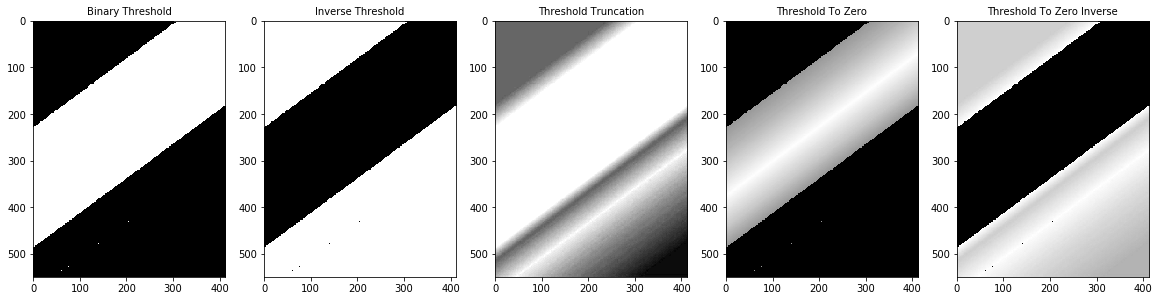

In [71]:
binarythresh = cv2.threshold(bwrainbow,127,255,cv2.THRESH_BINARY) #127 is the half way point between 0 and 255.
inversethresh = cv2.threshold(bwrainbow,127,255,cv2.THRESH_BINARY_INV)
threshtrunc = cv2.threshold(bwrainbow,127,255,cv2.THRESH_TRUNC)
threshtozero = cv2.threshold(bwrainbow,127,255,cv2.THRESH_TOZERO)
inversethreshtozero = cv2.threshold(bwrainbow,127,255,cv2.THRESH_TOZERO_INV)

fig = plt.figure(figsize=(20,35))
ax1 = fig.add_subplot(1,5,1)
plt.title('Binary Threshold', fontsize=10)
ax1.imshow(binarythresh[1],cmap='gray')
ax2 = fig.add_subplot(1,5,2)
plt.title('Inverse Threshold', fontsize=10)
ax2.imshow(inversethresh[1],cmap='gray')
ax3 = fig.add_subplot(1,5,3)
plt.title('Threshold Truncation', fontsize=10)
ax3.imshow(threshtrunc[1],cmap='gray')
ax4 = fig.add_subplot(1,5,4)
plt.title('Threshold To Zero', fontsize=10)
ax4.imshow(threshtozero[1],cmap='gray')
ax5 = fig.add_subplot(1,5,5)
plt.title('Threshold To Zero Inverse', fontsize=10)
ax5.imshow(inversethreshtozero[1],cmap='gray')

# Using Adaptive Thresholding on a Crossword Image

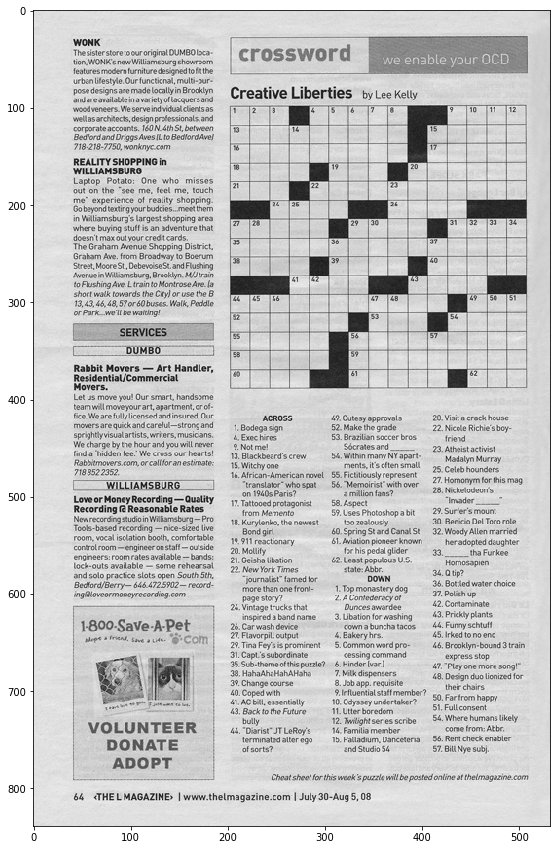

In [72]:
crossword = cv2.imread('crossword.jpg',0)
#Display Image
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(crossword, cmap='gray')

**Binary Threshold**

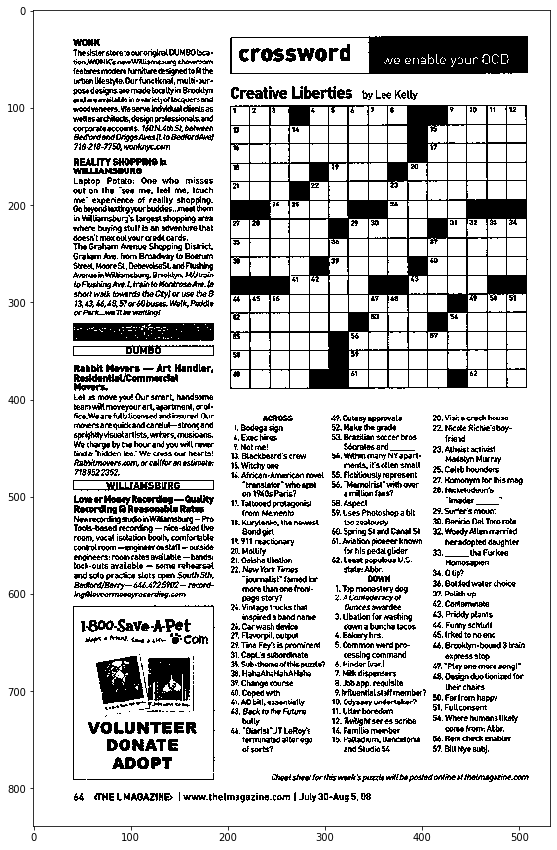

In [80]:
binarythreshcrossword = cv2.threshold(crossword,180,255,cv2.THRESH_BINARY) #Experiment with the Threshold value
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(binarythreshcrossword[1], cmap='gray')

**Adaptive Thresholding**


*   Mean
*   Gaussian



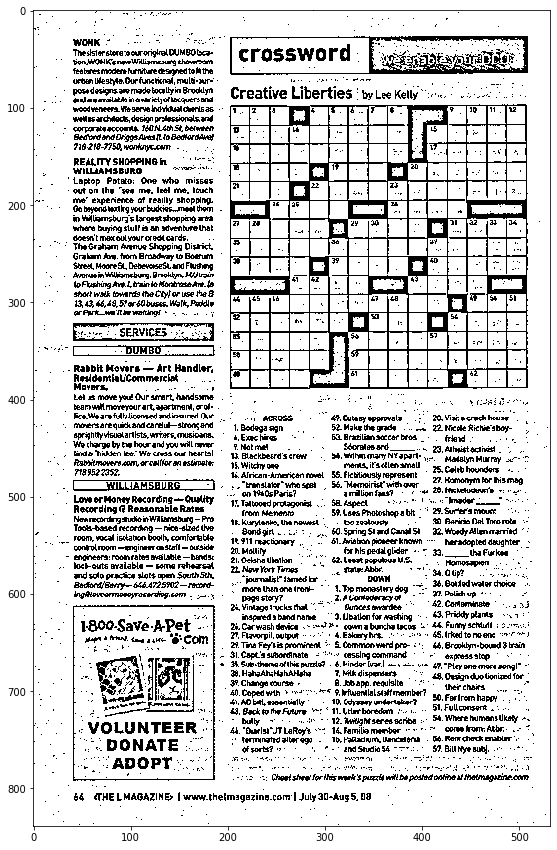

In [81]:
adaptivethresh = cv2.adaptiveThreshold(crossword,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,8) # Play around with these last 2 numbers
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(adaptivethresh, cmap='gray')

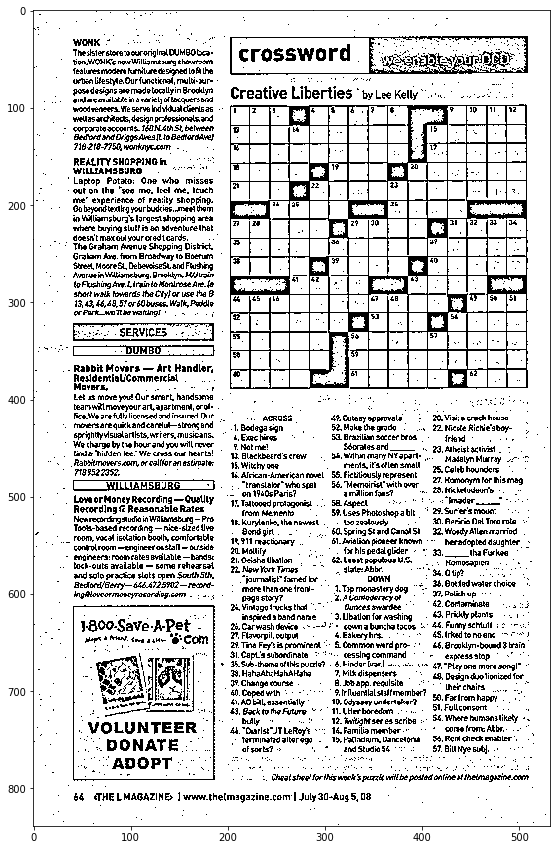

In [82]:
gaussianthresh = cv2.adaptiveThreshold(crossword,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,8)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(gaussianthresh, cmap='gray')

# Challenge - Blend the Binary Threshold image with the Mean or Gaussian images using simple blending.

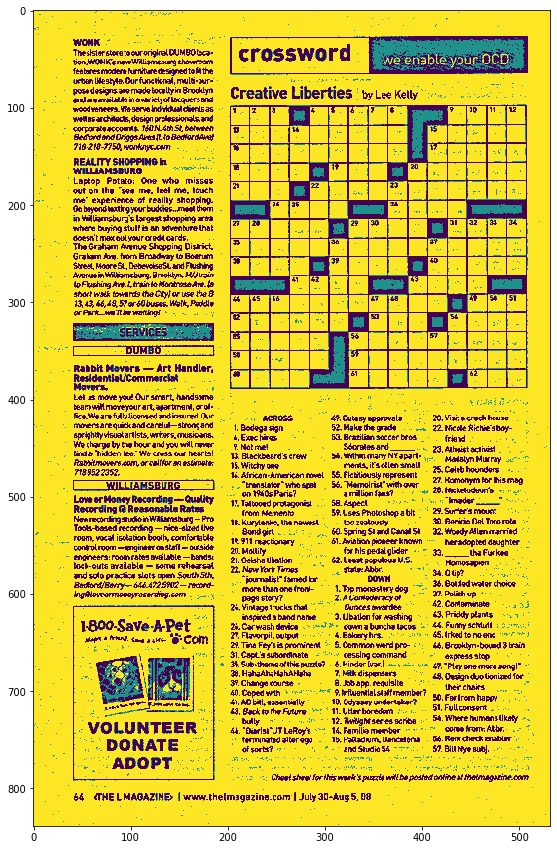

In [88]:
#Both these images are the same size so it is easy to blend the images together.
blended = cv2.addWeighted(src1=binarythreshcrossword[1],alpha=0.1,src2=adaptivethresh,beta=0.1,gamma=0) #Try changing the alpha and beta value.
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(blended)

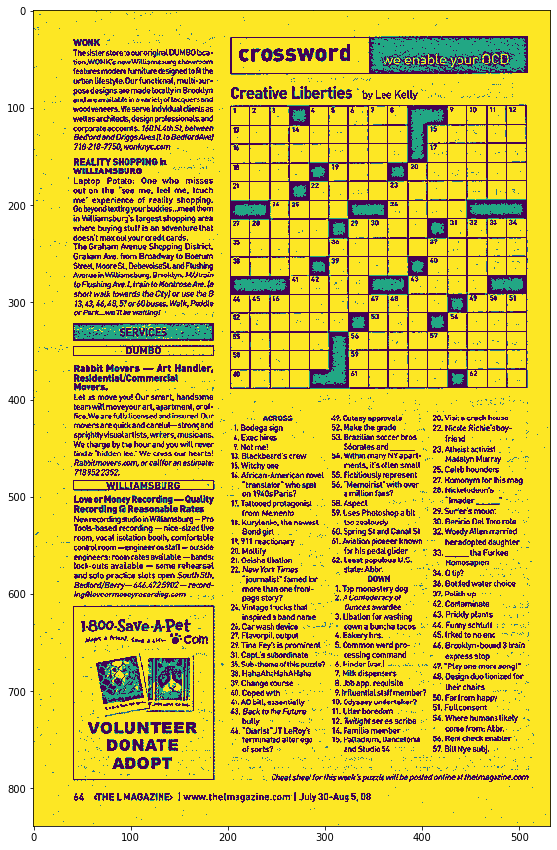

In [87]:
#Both these images are the same size so it is easy to blend the images together.
blended = cv2.addWeighted(src1=binarythreshcrossword[1],alpha=0.4,src2=gaussianthresh,beta=0.6,gamma=0) #Try changing the alpha and beta value.
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(blended)